<a href="https://colab.research.google.com/github/raghavanpartha/FirstApp/blob/main/03_Defining_and_training_the_Generator_model_(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np

## Generator Synthetizer

In [ ]:
def define_generator(latent_dim):
    model = keras.models.Sequential()
    #Latent Space
    model.add(keras.layers.Dense(units= 128 * 7 * 7, input_dim= latent_dim))
    model.add(keras.layers.LeakyReLU(0.2))
    #Reshaping it to an image format
    model.add(keras.layers.Reshape((7, 7, 128)))
    
    #Upsampling
    model.add(keras.layers.Conv2DTranspose(filters= 128,
                                           kernel_size= (4,4),
                                           strides= (2, 2),
                                           padding= 'same'))
    model.add(keras.layers.LeakyReLU(0.2))
    model.add(keras.layers.Conv2DTranspose(filters= 128,
                                           kernel_size= (4,4),
                                           strides= (2, 2),
                                           padding= 'same'))
    model.add(keras.layers.LeakyReLU(0.2))
    model.add(keras.layers.Conv2D(filters= 1,
                                  kernel_size= (7, 7),
                                  activation= 'sigmoid', 
                                  padding= 'same'))
    return model

In [ ]:
latent_dim = 100
model = define_generator(latent_dim= latent_dim)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 128)       0

# Generating examples

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    X_input = np.random.randn(latent_dim * n_samples)
    X_input = X_input.reshape((n_samples, latent_dim))
    return X_input

In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    X_input = generate_latent_points(latent_dim= latent_dim,
                                     n_samples= n_samples)
    X = g_model.predict(X_input)
    y = np.zeros((n_samples, 1))
    return X, y

# Trying the model

In [ ]:
latent_dim = 100
samples = 25
g_model = define_generator(latent_dim= latent_dim)
X, _ = generate_fake_samples(g_model= g_model, latent_dim= latent_dim, n_samples= samples)

## Visualizing the model

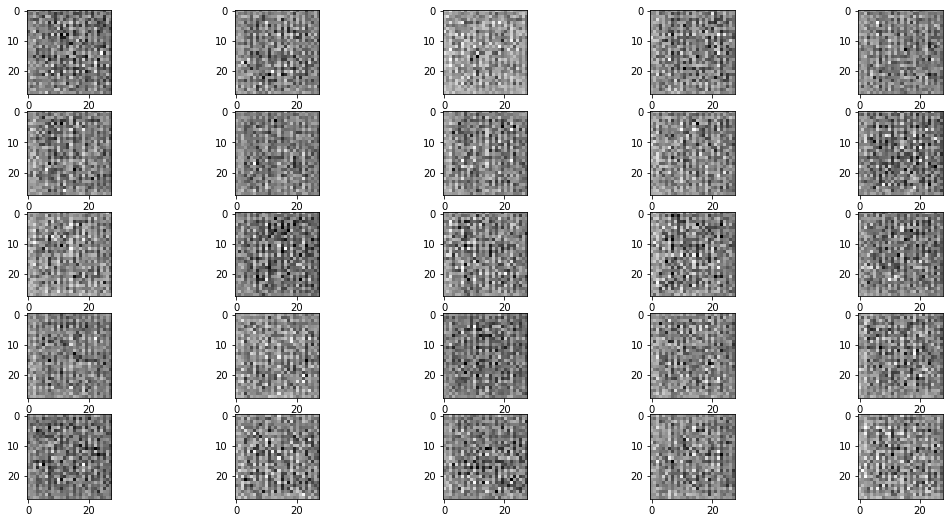

In [ ]:
plt.figure(figsize= (18,9))
for i in range(samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i,:,:,0], cmap= 'gray_r')
plt.show()